<a href="https://colab.research.google.com/github/rajeshkpandey/AWESOME-FER/blob/master/Epidemics_ABM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

node degree clustering
0 9 0.16666666666666666
1 11 0.10909090909090909
2 8 0.07142857142857142
3 11 0.12727272727272726
4 5 0.2
5 10 0.06666666666666667
6 11 0.16363636363636364
7 11 0.07272727272727272
8 12 0.18181818181818182
9 5 0.1
10 8 0
11 8 0.03571428571428571
12 10 0.06666666666666667
13 8 0.07142857142857142
14 8 0.07142857142857142
15 8 0.10714285714285714
16 5 0.2
17 4 0
18 11 0.10909090909090909
19 8 0.14285714285714285
20 9 0.05555555555555555
21 6 0.06666666666666667
22 10 0.044444444444444446
23 7 0.14285714285714285
24 10 0.1111111111111111
25 12 0.030303030303030304
26 5 0
27 11 0.10909090909090909
28 11 0.05454545454545454
29 14 0.054945054945054944
30 9 0.05555555555555555
31 7 0
32 11 0.03636363636363636
33 12 0.09090909090909091
34 7 0.09523809523809523
35 7 0.09523809523809523
36 8 0.10714285714285714
37 10 0.1111111111111111
38 7 0.14285714285714285
39 10 0.17777777777777778
40 6 0.06666666666666667
41 11 0.09090909090909091
42 4 0.16666666666666666
43 10 0.0444

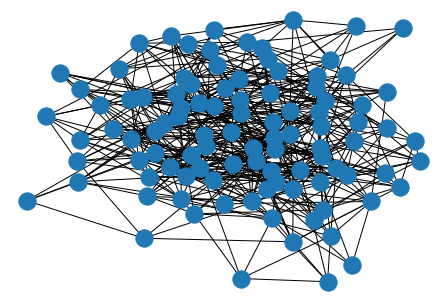

In [1]:
#Erdos-Renyi Graph in Networkx
import random
from networkx import nx
import matplotlib.pyplot as plt

N = 100  # 100 nodes
K = 200  # 200 agents
#M = 300  # 300 edges

#G = nx.gnm_random_graph(N, M)

P = 0.1 #Probabibilty for Node Connection in random graph
G = nx.erdos_renyi_graph(N,P) # Use Networkx to generate a random graph of N nodes being connected with probability P.

# some properties
print("node degree clustering")
for v in nx.nodes(G):
    print(f"{v} {nx.degree(G, v)} {nx.clustering(G, v)}")

print()
print("the adjacency list")
for line in nx.generate_adjlist(G):
    print(line)

nx.draw(G)
plt.show()

In [2]:
A = nx.adjacency_matrix(G)
Adjacency_matrix = A.todense()
print(Adjacency_matrix[0])

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0
  0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [3]:
#Empty Node Dictionary [ A list of dictionaries]
Nodes = {}
Nodes_next = {}
print(Nodes)
for i in range(N):
  Nodes[i] = list()
  Nodes_next[i] = list()  
print(Nodes)
print(Nodes_next)   

{}
{0: [], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: [], 10: [], 11: [], 12: [], 13: [], 14: [], 15: [], 16: [], 17: [], 18: [], 19: [], 20: [], 21: [], 22: [], 23: [], 24: [], 25: [], 26: [], 27: [], 28: [], 29: [], 30: [], 31: [], 32: [], 33: [], 34: [], 35: [], 36: [], 37: [], 38: [], 39: [], 40: [], 41: [], 42: [], 43: [], 44: [], 45: [], 46: [], 47: [], 48: [], 49: [], 50: [], 51: [], 52: [], 53: [], 54: [], 55: [], 56: [], 57: [], 58: [], 59: [], 60: [], 61: [], 62: [], 63: [], 64: [], 65: [], 66: [], 67: [], 68: [], 69: [], 70: [], 71: [], 72: [], 73: [], 74: [], 75: [], 76: [], 77: [], 78: [], 79: [], 80: [], 81: [], 82: [], 83: [], 84: [], 85: [], 86: [], 87: [], 88: [], 89: [], 90: [], 91: [], 92: [], 93: [], 94: [], 95: [], 96: [], 97: [], 98: [], 99: []}
{0: [], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: [], 10: [], 11: [], 12: [], 13: [], 14: [], 15: [], 16: [], 17: [], 18: [], 19: [], 20: [], 21: [], 22: [], 23: [], 24: [], 25: [], 26: [],

In [4]:
#Adding Virus_presence Randomly
for i in range(N):
  Virus_presence=random.uniform(0,1)
  Nodes[i].append(Virus_presence)
print(Nodes)

{0: [0.2902111391155494], 1: [0.7787693607258156], 2: [0.3093257113821455], 3: [0.4513489197918157], 4: [0.9068186301917962], 5: [0.8528703704478762], 6: [0.1531500292696346], 7: [0.7876963276413971], 8: [0.84500052955857], 9: [0.9994461358142929], 10: [0.614154163406263], 11: [0.8589549743244342], 12: [0.03264384170739709], 13: [0.47870362504562214], 14: [0.4705108194939711], 15: [0.22598588052961566], 16: [0.6611235990296156], 17: [0.6789406803669633], 18: [0.34852072762612385], 19: [0.4675599157085105], 20: [0.6936881089269592], 21: [0.803555927296782], 22: [0.8510969112238137], 23: [0.2596358325260214], 24: [0.9751380886284767], 25: [0.37589946604313484], 26: [0.6807916785853237], 27: [0.20052345800936933], 28: [0.31094736114657184], 29: [0.9712593979711354], 30: [0.9320219239142963], 31: [0.09910143300061947], 32: [0.850440437917541], 33: [0.5557622309005131], 34: [0.05689462758514352], 35: [0.48698550724513534], 36: [0.3648117803292763], 37: [0.21723732175314192], 38: [0.15643357

In [5]:
#Initailizing randomly infection state [0 shows Recovered, 1 shows Susceptible, and 2 shows Infected]
for k in range(K):
  rand_node=random.randint(0,N-1)
  rand_state=random.randint(0,2)
  Nodes[rand_node].append(rand_state)
print(Nodes)

{0: [0.2902111391155494, 0, 2, 2, 1, 1], 1: [0.7787693607258156], 2: [0.3093257113821455, 1, 0], 3: [0.4513489197918157, 0, 0, 2, 2, 0], 4: [0.9068186301917962], 5: [0.8528703704478762, 2, 0], 6: [0.1531500292696346, 2, 2], 7: [0.7876963276413971, 1, 2, 1, 1, 1], 8: [0.84500052955857, 0, 0, 2, 0, 1], 9: [0.9994461358142929], 10: [0.614154163406263, 2, 0, 2], 11: [0.8589549743244342, 1, 1, 1], 12: [0.03264384170739709, 1, 2], 13: [0.47870362504562214, 0], 14: [0.4705108194939711], 15: [0.22598588052961566, 0, 1], 16: [0.6611235990296156, 0], 17: [0.6789406803669633, 1, 0, 1], 18: [0.34852072762612385, 2, 1, 0, 0, 2], 19: [0.4675599157085105, 0, 2], 20: [0.6936881089269592, 1], 21: [0.803555927296782, 1, 1, 1], 22: [0.8510969112238137, 0], 23: [0.2596358325260214, 0, 0, 0], 24: [0.9751380886284767, 0], 25: [0.37589946604313484, 2], 26: [0.6807916785853237, 1, 1], 27: [0.20052345800936933], 28: [0.31094736114657184, 2], 29: [0.9712593979711354, 0, 2, 1], 30: [0.9320219239142963, 2, 1, 1],

In [6]:
#Random Walk Implementation
def random_walk(G, num_walks=1, num_steps=1):
    walks = list()
    for i in G.nodes():
      Nodes_next[i].append(Nodes[i][0])
      print(Nodes_next[i][0])
      print(Nodes[i][0])
    print(Nodes)
    print(Nodes_next)
    for i in G.nodes():
        print(i)
        print(list(range(1,len(Nodes[i]))))
        for agent in list(range(1,len(Nodes[i]))):
          print(Nodes[i][agent])
          for walk in range(num_walks):
              curr_walk = [i]
              curr = i
              for step in range(num_steps):
                  neighbors = list(G.neighbors(curr))
                  neighbors.append(curr) #including no movement case
                  possible_moves=neighbors 
                  if len(possible_moves) > 0:
                      next = random.choice(possible_moves)
                  Nodes_next[next].append(Nodes[curr][agent])
                  curr_walk.append(next)
                  print(curr_walk)
              walks.append(next)
    #print(walks)

In [7]:
random_walk(G)

0.2902111391155494
0.2902111391155494
0.7787693607258156
0.7787693607258156
0.3093257113821455
0.3093257113821455
0.4513489197918157
0.4513489197918157
0.9068186301917962
0.9068186301917962
0.8528703704478762
0.8528703704478762
0.1531500292696346
0.1531500292696346
0.7876963276413971
0.7876963276413971
0.84500052955857
0.84500052955857
0.9994461358142929
0.9994461358142929
0.614154163406263
0.614154163406263
0.8589549743244342
0.8589549743244342
0.03264384170739709
0.03264384170739709
0.47870362504562214
0.47870362504562214
0.4705108194939711
0.4705108194939711
0.22598588052961566
0.22598588052961566
0.6611235990296156
0.6611235990296156
0.6789406803669633
0.6789406803669633
0.34852072762612385
0.34852072762612385
0.4675599157085105
0.4675599157085105
0.6936881089269592
0.6936881089269592
0.803555927296782
0.803555927296782
0.8510969112238137
0.8510969112238137
0.2596358325260214
0.2596358325260214
0.9751380886284767
0.9751380886284767
0.37589946604313484
0.37589946604313484
0.68079167

In [8]:
print(Nodes)
print(Nodes_next)

{0: [0.2902111391155494, 0, 2, 2, 1, 1], 1: [0.7787693607258156], 2: [0.3093257113821455, 1, 0], 3: [0.4513489197918157, 0, 0, 2, 2, 0], 4: [0.9068186301917962], 5: [0.8528703704478762, 2, 0], 6: [0.1531500292696346, 2, 2], 7: [0.7876963276413971, 1, 2, 1, 1, 1], 8: [0.84500052955857, 0, 0, 2, 0, 1], 9: [0.9994461358142929], 10: [0.614154163406263, 2, 0, 2], 11: [0.8589549743244342, 1, 1, 1], 12: [0.03264384170739709, 1, 2], 13: [0.47870362504562214, 0], 14: [0.4705108194939711], 15: [0.22598588052961566, 0, 1], 16: [0.6611235990296156, 0], 17: [0.6789406803669633, 1, 0, 1], 18: [0.34852072762612385, 2, 1, 0, 0, 2], 19: [0.4675599157085105, 0, 2], 20: [0.6936881089269592, 1], 21: [0.803555927296782, 1, 1, 1], 22: [0.8510969112238137, 0], 23: [0.2596358325260214, 0, 0, 0], 24: [0.9751380886284767, 0], 25: [0.37589946604313484, 2], 26: [0.6807916785853237, 1, 1], 27: [0.20052345800936933], 28: [0.31094736114657184, 2], 29: [0.9712593979711354, 0, 2, 1], 30: [0.9320219239142963, 2, 1, 1],